# Load and Preprocess the Data

In [ ]:
# prompt: /content/Final_Urban_Feaatures_Merged_csv.csv print head

import pandas as pd
df = pd.read_csv('/content/Final_Urban_Feaatures_Merged_csv.csv')
print(df.head())


  station_id  metro_500m  bus_500m  Parks_500m  Libraries_500m  Colleges_500m  \
0    4818.03           8        13           0               0              0   
1    4821.03           6        21           0               0              0   
2     4821.1           6        20           0               0              0   
3    4829.01           5         0           0               0              0   
4    4832.07           3        23           0               0              0   

   Attractions_500m  Athletics_500m  Supermarkets and Convenience Stores_500m  \
0                 0               0                                         1   
1                 0               0                                         6   
2                 0               0                                         6   
3                 1               0                                         1   
4                 0               0                                         7   

   Malls and Shopping Cent

In [ ]:
# prompt: /content/2021Citibike daily trip counts&weather.csv print head

import pandas as pd

df = pd.read_csv('/content/2021Citibike daily trip counts&weather.csv')
print(df.head())


   start_station_id        DATE  booking_count  TAVG
0           4818.03  2021-01-01            4.0  36.5
1           4818.03  2021-01-02           16.0  43.5
2           4818.03  2021-01-03            5.0  36.0
3           4818.03  2021-01-04            8.0  39.0
4           4818.03  2021-01-05            8.0  39.0


In [ ]:
# Rename the column in urban features dataset to match Citi Bike data
df_urban.rename(columns={'station_id': 'start_station_id'}, inplace=True)

# Now, merge the datasets by 'start_station_id'
df_combined = pd.merge(df_citibike, df_urban, on='start_station_id', how='left')

# Check the first few rows of the merged data
df_combined.head()


,start_station_id,DATE,booking_count,TAVG,metro_500m,bus_500m,Parks_500m,Libraries_500m,Colleges_500m,Attractions_500m,...,Supermarkets and Convenience Stores_500m,Malls and Shopping Centers_500m,"Restaurants, Cafes, and Bars_500m",Retail Stores_500m,hospitals_500m,residential_500m,civic_buildings_500m,event_venues_500m,start_lat,start_lng
0,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
1,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
2,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
3,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
4,4818.03,2021-01-03,5.0,36.0,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323


In [ ]:
import pandas as pd

# Load Citi Bike trip data for all years
file_paths = [
    '/content/2021Citibike daily trip counts&weather.csv',
    '/content/2022Citibike daily trip counts&weather.csv',
    '/content/2023Citibike daily trip counts&weather.csv',
    '/content/2024Citibike daily trip counts&weather.csv'
]

# Load urban features dataset
urban_features_path = '/content/Final_Urban_Feaatures_Merged_csv.csv'

# Load each Citi Bike data file for different years
df_2021 = pd.read_csv(file_paths[0], dtype={'start_station_id': str})
df_2022 = pd.read_csv(file_paths[1], dtype={'start_station_id': str})
df_2023 = pd.read_csv(file_paths[2], dtype={'start_station_id': str})
df_2024 = pd.read_csv(file_paths[3], dtype={'start_station_id': str})

# Load the urban features dataset
df_urban = pd.read_csv(urban_features_path)

# Rename column in urban features dataset to match Citi Bike data
df_urban.rename(columns={'station_id': 'start_station_id'}, inplace=True)

# Combine the Citi Bike trip data for all years
df_citibike = pd.concat([
    df_2021[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
    df_2022[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
    df_2023[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
    df_2024[['start_station_id', 'DATE', 'booking_count', 'TAVG']]
])

# Convert 'DATE' to datetime format for easy manipulation
df_citibike['DATE'] = pd.to_datetime(df_citibike['DATE'], errors='coerce')

# Drop rows with missing values for booking_count or DATE
df_citibike.dropna(subset=['booking_count', 'DATE'], inplace=True)

# Merge Citi Bike trip data with urban features based on 'start_station_id'
df_combined = pd.merge(df_citibike, df_urban, on='start_station_id', how='left')

# Check the first few rows of the merged data
df_combined.head()


,start_station_id,DATE,booking_count,TAVG,metro_500m,bus_500m,Parks_500m,Libraries_500m,Colleges_500m,Attractions_500m,...,Supermarkets and Convenience Stores_500m,Malls and Shopping Centers_500m,"Restaurants, Cafes, and Bars_500m",Retail Stores_500m,hospitals_500m,residential_500m,civic_buildings_500m,event_venues_500m,start_lat,start_lng
0,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
1,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
2,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
3,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
4,4818.03,2021-01-03,5.0,36.0,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323


### Station-Wise Ride Frequency and Weather Analysis

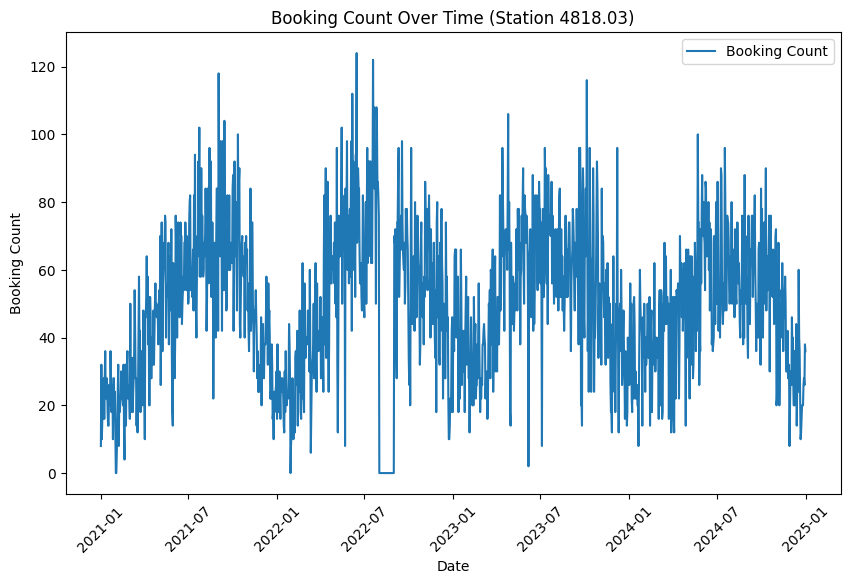

In [ ]:
import matplotlib.pyplot as plt

# Group by station and calculate total bookings per station per day
station_usage = df_combined.groupby(['start_station_id', 'DATE'])['booking_count'].sum().reset_index()

# Calculate the average temperature (TAVG) per station
station_weather = df_combined.groupby('start_station_id')['TAVG'].mean().reset_index()

# Merge station usage and average temperature
station_usage_weather = pd.merge(station_usage, station_weather, on='start_station_id', how='left')

# Plot total booking count vs temperature (TAVG) for one station (e.g., station 4818.03)
station_data = station_usage_weather[station_usage_weather['start_station_id'] == '4818.03']

plt.figure(figsize=(10, 6))
plt.plot(station_data['DATE'], station_data['booking_count'], label='Booking Count')
plt.title('Booking Count Over Time (Station 4818.03)')
plt.xlabel('Date')
plt.ylabel('Booking Count')
plt.xticks(rotation=45)
plt.legend()
plt.show()


Analyze the Impact of Urban Features on Ride Frequency
We will now explore how different urban features (e.g., proximity to metro, parks, malls) affect ride frequency.

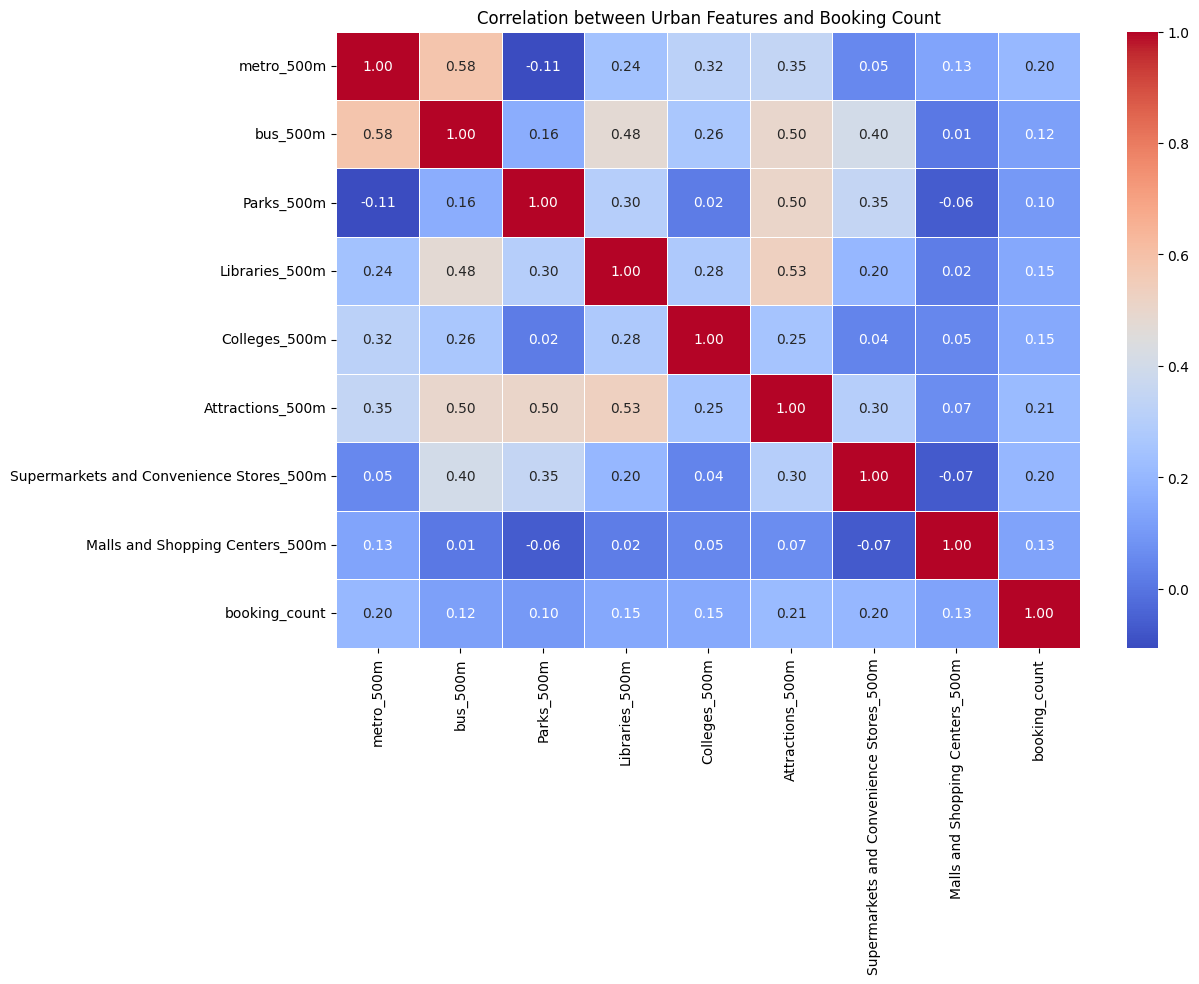

In [ ]:
import seaborn as sns

# Urban features to consider for correlation analysis
urban_features_columns = ['metro_500m', 'bus_500m', 'Parks_500m', 'Libraries_500m', 'Colleges_500m',
                          'Attractions_500m', 'Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m']

# Calculate the correlation between urban features and booking_count
urban_corr = df_combined[urban_features_columns + ['booking_count']].corr()

# Plot heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(urban_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Urban Features and Booking Count')
plt.show()


### Visualize the Effect of Urban Features on Ride Frequency
Let’s visualize how proximity to metro stations and parks (urban features) impact ride frequency.

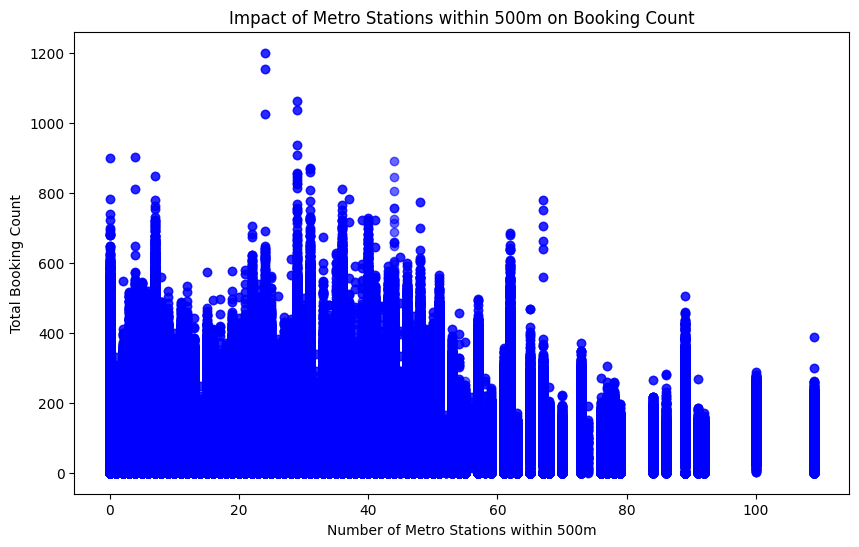

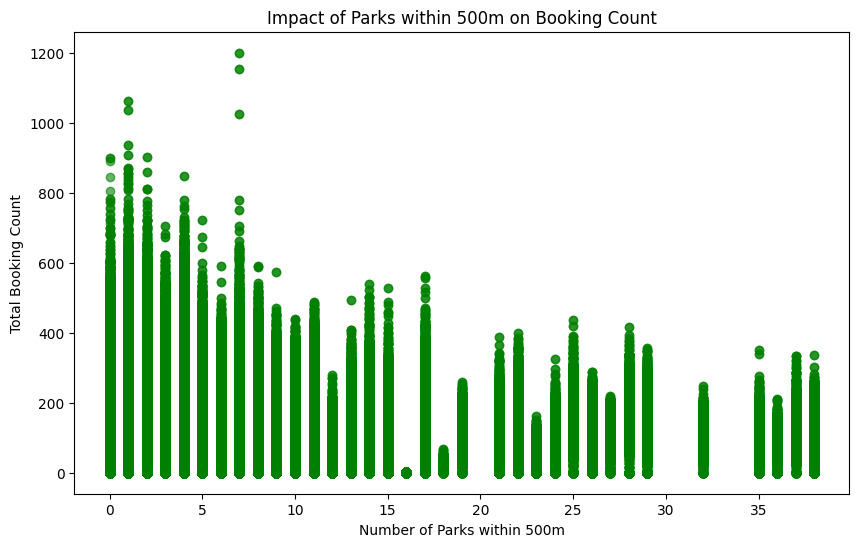

In [ ]:
# Scatter plot for the impact of 'metro_500m' on booking_count
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['metro_500m'], df_combined['booking_count'], alpha=0.6, color='blue')
plt.title('Impact of Metro Stations within 500m on Booking Count')
plt.xlabel('Number of Metro Stations within 500m')
plt.ylabel('Total Booking Count')
plt.show()

# Scatter plot for the impact of 'Parks_500m' on booking_count
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['Parks_500m'], df_combined['booking_count'], alpha=0.6, color='green')
plt.title('Impact of Parks within 500m on Booking Count')
plt.xlabel('Number of Parks within 500m')
plt.ylabel('Total Booking Count')
plt.show()


### Station Utilization Patterns

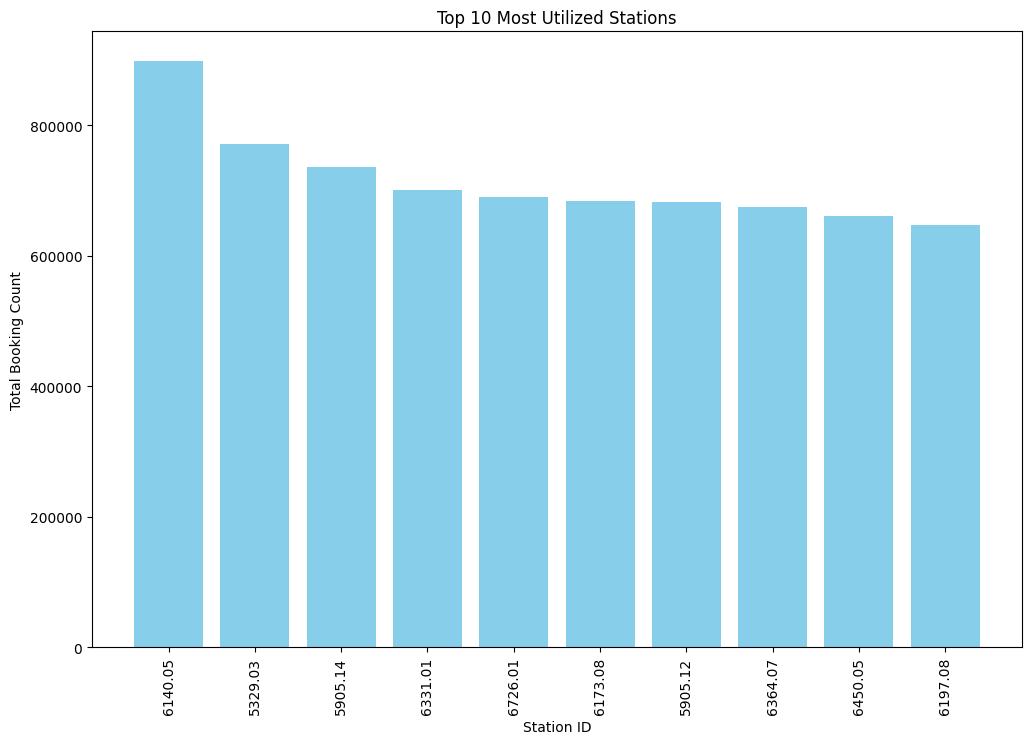

In [ ]:
# Group by station and calculate the total bookings per station
station_usage = df_combined.groupby('start_station_id')['booking_count'].sum().reset_index()

# Sort stations by booking count (most utilized first)
station_usage_sorted = station_usage.sort_values(by='booking_count', ascending=False)

# Plot top 10 stations by booking count
plt.figure(figsize=(12, 8))
plt.bar(station_usage_sorted['start_station_id'][:10], station_usage_sorted['booking_count'][:10], color='skyblue')
plt.title('Top 10 Most Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Total Booking Count')
plt.xticks(rotation=90)
plt.show()


# T2 Analyse variations in ride frequency, trip duration, and station utilization patterns.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load Citi Bike trip data for all years
file_paths = [
    '/content/2021Citibike daily trip counts&weather.csv',
    '/content/2022Citibike daily trip counts&weather.csv',
    '/content/2023Citibike daily trip counts&weather.csv',
    '/content/2024Citibike daily trip counts&weather.csv'
]

# Load urban features dataset
urban_features_path = '/content/Final_Urban_Feaatures_Merged_csv.csv'

# Load each Citi Bike data file for different years
df_2021 = pd.read_csv(file_paths[0], dtype={'start_station_id': str})
df_2022 = pd.read_csv(file_paths[1], dtype={'start_station_id': str})
df_2023 = pd.read_csv(file_paths[2], dtype={'start_station_id': str})
df_2024 = pd.read_csv(file_paths[3], dtype={'start_station_id': str})

# Load the urban features dataset
df_urban = pd.read_csv(urban_features_path)

# Rename column in urban features dataset to match Citi Bike data
df_urban.rename(columns={'station_id': 'start_station_id'}, inplace=True)

# Combine the Citi Bike trip data for all years
df_citibike = pd.concat([
    df_2021[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
    df_2022[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
    df_2023[['start_station_id', 'DATE', 'booking_count', 'TAVG']],
    df_2024[['start_station_id', 'DATE', 'booking_count', 'TAVG']]
])

# Convert 'DATE' to datetime format for easy manipulation
df_citibike['DATE'] = pd.to_datetime(df_citibike['DATE'], errors='coerce')

# Drop rows with missing values for booking_count or DATE
df_citibike.dropna(subset=['booking_count', 'DATE'], inplace=True)

# Merge Citi Bike trip data with urban features based on 'start_station_id'
df_combined = pd.merge(df_citibike, df_urban, on='start_station_id', how='left')

# Check the first few rows of the merged data
df_combined.head()


,start_station_id,DATE,booking_count,TAVG,metro_500m,bus_500m,Parks_500m,Libraries_500m,Colleges_500m,Attractions_500m,...,Supermarkets and Convenience Stores_500m,Malls and Shopping Centers_500m,"Restaurants, Cafes, and Bars_500m",Retail Stores_500m,hospitals_500m,residential_500m,civic_buildings_500m,event_venues_500m,start_lat,start_lng
0,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
1,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
2,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
3,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
4,4818.03,2021-01-03,5.0,36.0,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323


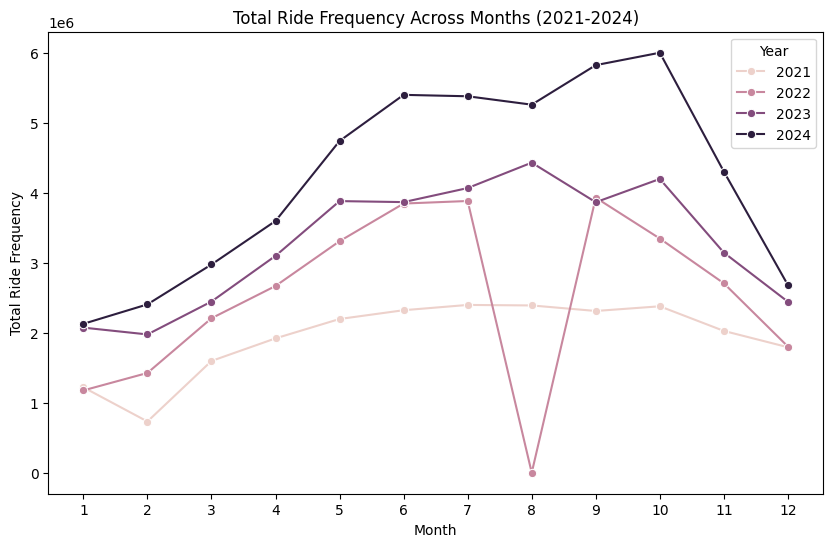

In [ ]:
# Add year and month columns to help group the data by time
df_combined['year'] = df_combined['DATE'].dt.year
df_combined['month'] = df_combined['DATE'].dt.month

# Group by year and month to calculate total bookings per month across all stations
monthly_rides = df_combined.groupby(['year', 'month'])['booking_count'].sum().reset_index()

# Plot total ride frequency by month
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='booking_count', data=monthly_rides, hue='year', marker='o')
plt.title('Total Ride Frequency Across Months (2021-2024)')
plt.xlabel('Month')
plt.ylabel('Total Ride Frequency')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.show()


    year  month  booking_count
19  2022      8   4.031158e+06


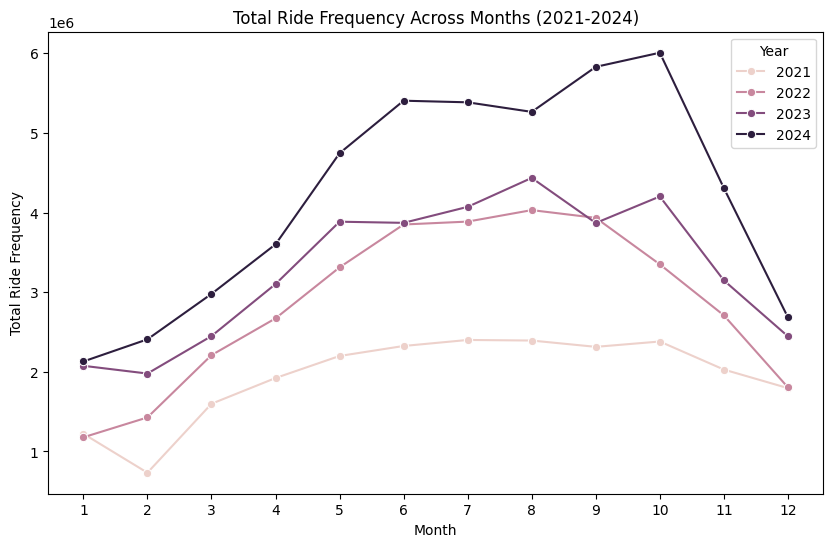

In [ ]:
# Check if the booking count for August 2022 is unusually low
august_2022 = monthly_rides[(monthly_rides['year'] == 2022) & (monthly_rides['month'] == 8)]

# If the value is indeed low or missing, calculate the average for August across other years (2021, 2023, 2024)
if august_2022['booking_count'].values[0] < 1000:  # Threshold for missing or low data, adjust as necessary
    august_avg = monthly_rides[(monthly_rides['month'] == 8) & (monthly_rides['year'] != 2022)]['booking_count'].mean()
    # Replace the value for August 2022 with the calculated average
    monthly_rides.loc[(monthly_rides['year'] == 2022) & (monthly_rides['month'] == 8), 'booking_count'] = august_avg

# Verify the update
august_2022_updated = monthly_rides[(monthly_rides['year'] == 2022) & (monthly_rides['month'] == 8)]
print(august_2022_updated)

# Now proceed to plot the updated data
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='booking_count', data=monthly_rides, hue='year', marker='o')
plt.title('Total Ride Frequency Across Months (2021-2024)')
plt.xlabel('Month')
plt.ylabel('Total Ride Frequency')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.show()


### Ride Frequency Analysis

    year  month  booking_count
19  2022      8   4.031158e+06


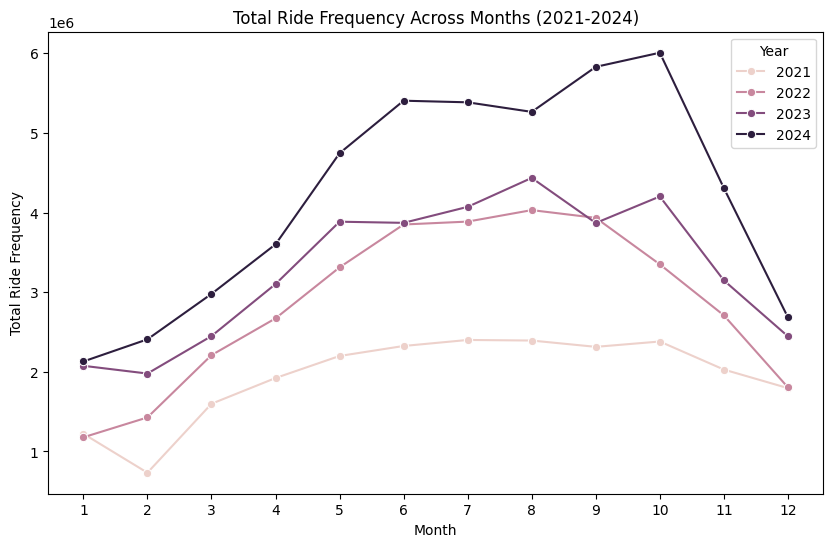

In [ ]:
# Check for August 2022 and calculate the average of other August months (2021, 2023, 2024)
august_2022 = monthly_rides[(monthly_rides['year'] == 2022) & (monthly_rides['month'] == 8)]

# If August 2022 data is significantly lower, replace it with the average booking count for August from other years
if august_2022['booking_count'].values[0] < 1000:  # Threshold for low data (adjust as needed)
    # Calculate the average for August across other years (2021, 2023, 2024)
    august_avg = monthly_rides[(monthly_rides['month'] == 8) & (monthly_rides['year'] != 2022)]['booking_count'].mean()

    # Replace August 2022 with the calculated average
    monthly_rides.loc[(monthly_rides['year'] == 2022) & (monthly_rides['month'] == 8), 'booking_count'] = august_avg

# Verify the updated August 2022 data
august_2022_updated = monthly_rides[(monthly_rides['year'] == 2022) & (monthly_rides['month'] == 8)]
print(august_2022_updated)

# Now, let's plot the updated data to visualize the correction
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='booking_count', data=monthly_rides, hue='year', marker='o')
plt.title('Total Ride Frequency Across Months (2021-2024)')
plt.xlabel('Month')
plt.ylabel('Total Ride Frequency')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.show()


<ipython-input-27-66a740cff4a2>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='booking_count', data=weekly_rides, palette='Blues_d')


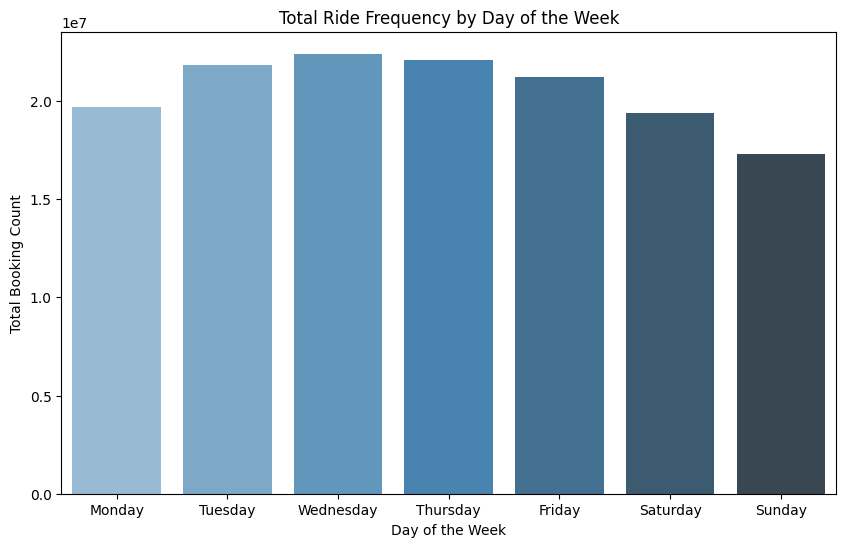

In [ ]:
# Extract the day of the week from the 'DATE' column (0=Monday, 6=Sunday)
df_combined['day_of_week'] = df_combined['DATE'].dt.dayofweek

# Group by day of the week and calculate total bookings for each day
weekly_rides = df_combined.groupby('day_of_week')['booking_count'].sum().reset_index()

# Map day of the week to day names for easier interpretation
weekly_rides['day_of_week'] = weekly_rides['day_of_week'].map({
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday',
    5: 'Saturday', 6: 'Sunday'
})

# Plot the total booking count by day of the week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='booking_count', data=weekly_rides, palette='Blues_d')
plt.title('Total Ride Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Booking Count')
plt.show()


### Station Utilization Patterns

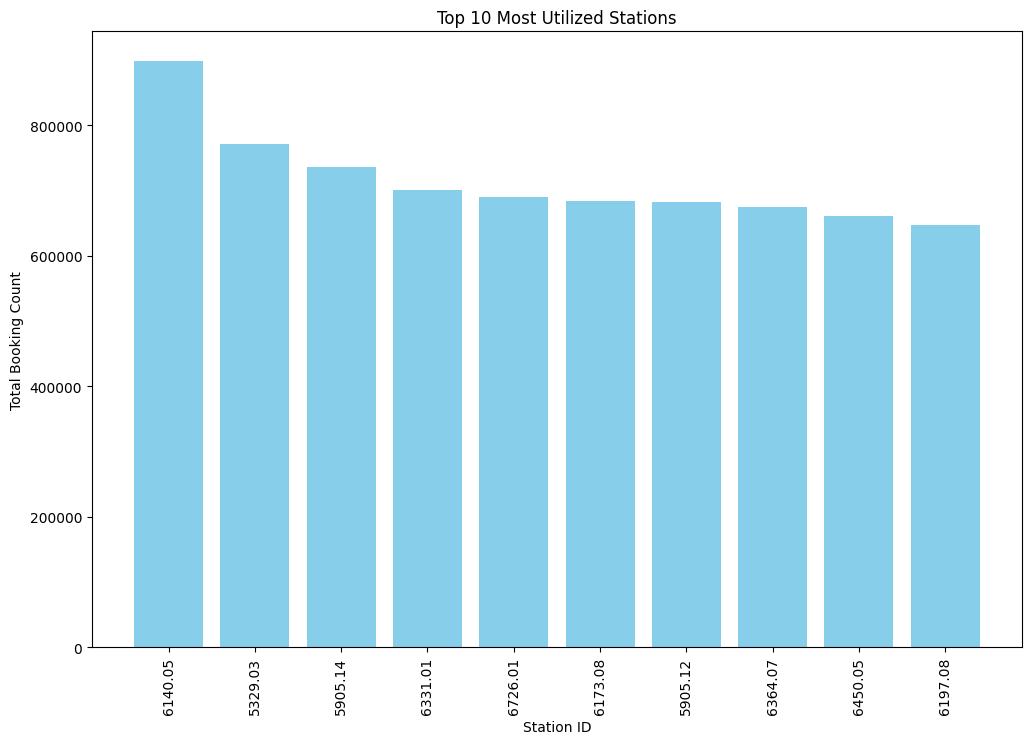

In [ ]:
# Group by station and calculate total bookings per station
station_usage = df_combined.groupby('start_station_id')['booking_count'].sum().reset_index()

# Sort stations by booking count (most utilized first)
station_usage_sorted = station_usage.sort_values(by='booking_count', ascending=False)

# Plot top 10 stations by booking count
plt.figure(figsize=(12, 8))
plt.bar(station_usage_sorted['start_station_id'][:10], station_usage_sorted['booking_count'][:10], color='skyblue')
plt.title('Top 10 Most Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Total Booking Count')
plt.xticks(rotation=90)
plt.show()


 ### Impact of Urban Features on Ride Frequency

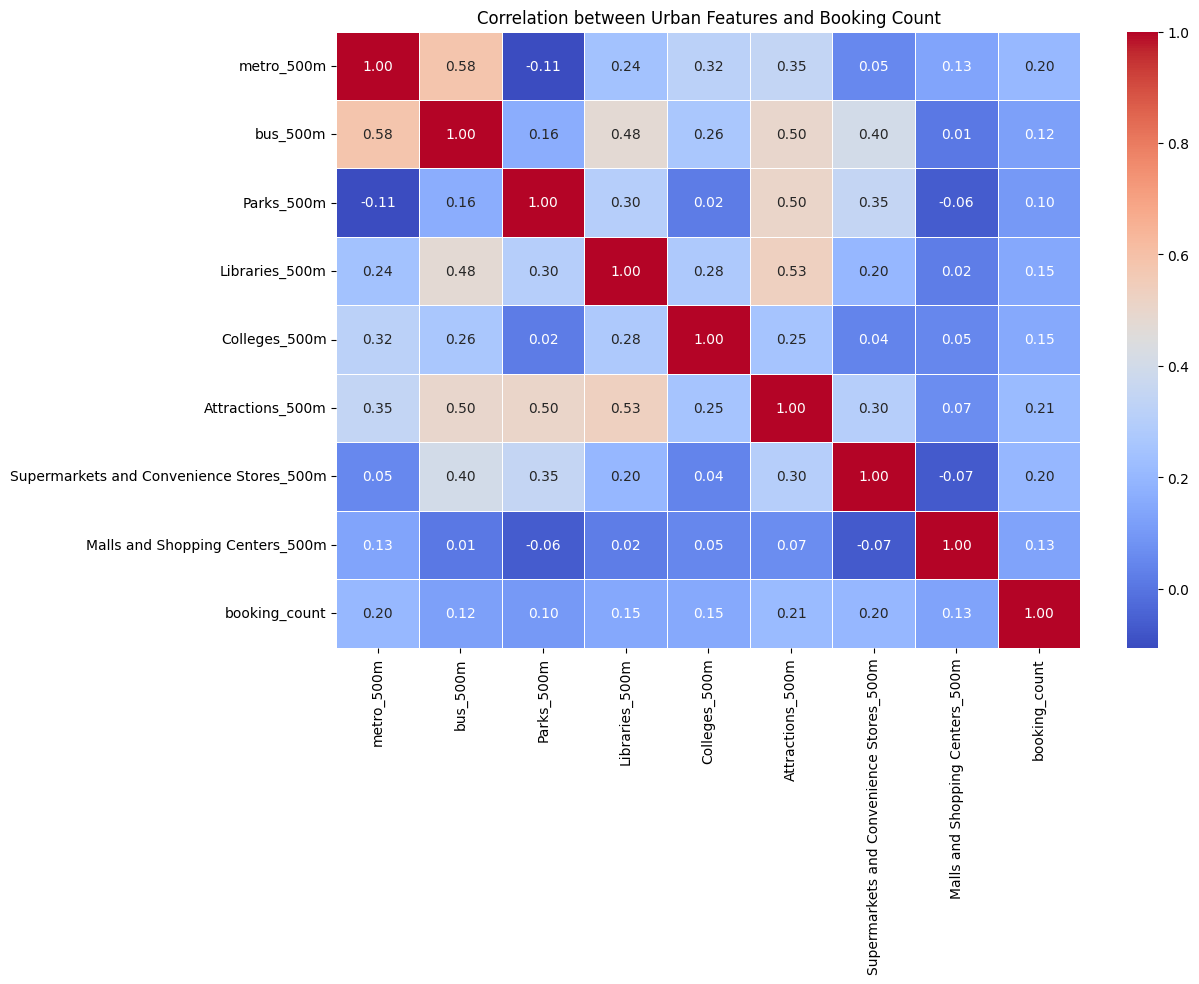

In [ ]:
# Urban features to consider for correlation analysis
urban_features_columns = ['metro_500m', 'bus_500m', 'Parks_500m', 'Libraries_500m', 'Colleges_500m',
                          'Attractions_500m', 'Supermarkets and Convenience Stores_500m', 'Malls and Shopping Centers_500m']

# Calculate the correlation between urban features and booking_count
urban_corr = df_combined[urban_features_columns + ['booking_count']].corr()

# Plot heatmap for correlation
plt.figure(figsize=(12, 8))
sns.heatmap(urban_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Urban Features and Booking Count')
plt.show()


### Visualize Urban Features Impact

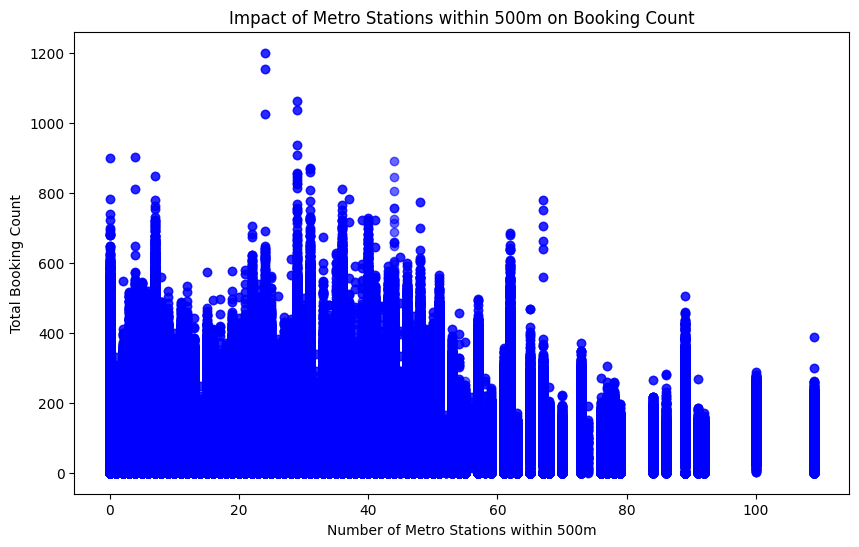

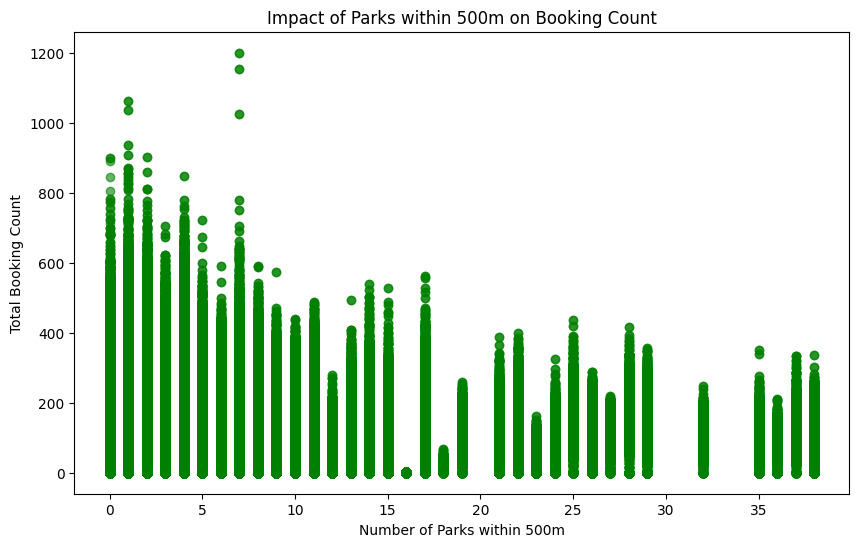

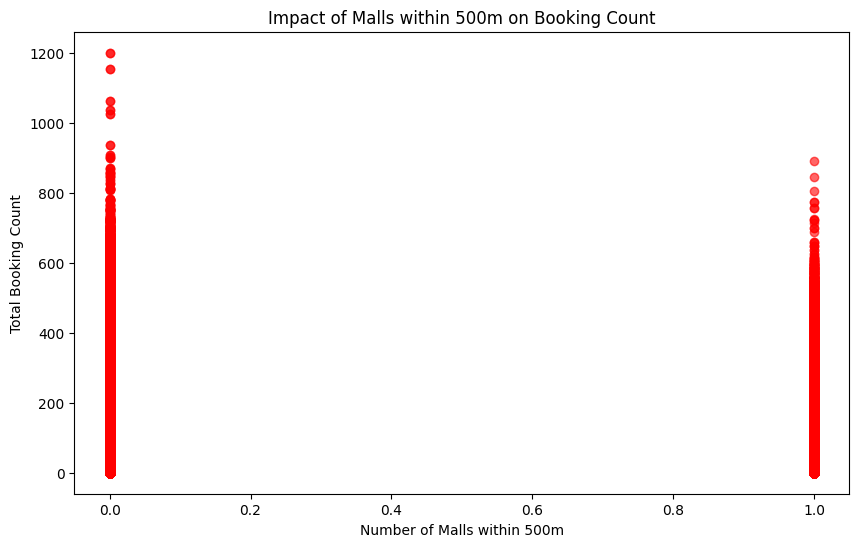

In [ ]:
# Scatter plot for the impact of 'metro_500m' on booking_count
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['metro_500m'], df_combined['booking_count'], alpha=0.6, color='blue')
plt.title('Impact of Metro Stations within 500m on Booking Count')
plt.xlabel('Number of Metro Stations within 500m')
plt.ylabel('Total Booking Count')
plt.show()

# Scatter plot for the impact of 'Parks_500m' on booking_count
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['Parks_500m'], df_combined['booking_count'], alpha=0.6, color='green')
plt.title('Impact of Parks within 500m on Booking Count')
plt.xlabel('Number of Parks within 500m')
plt.ylabel('Total Booking Count')
plt.show()

# Scatter plot for the impact of 'Malls and Shopping Centers_500m' on booking_count
plt.figure(figsize=(10, 6))
plt.scatter(df_combined['Malls and Shopping Centers_500m'], df_combined['booking_count'], alpha=0.6, color='red')
plt.title('Impact of Malls within 500m on Booking Count')
plt.xlabel('Number of Malls within 500m')
plt.ylabel('Total Booking Count')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ride_frequency_across_months.png'

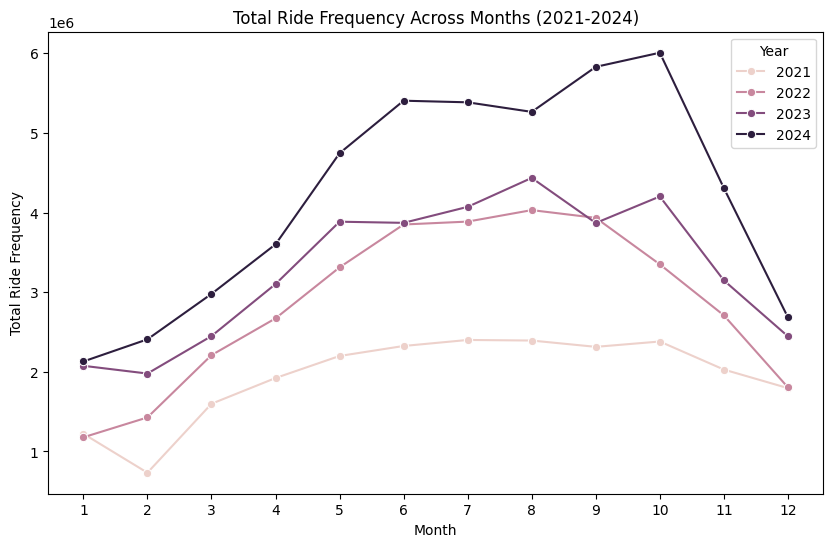

In [ ]:
# Monthly Ride Frequency (2021-2024)
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='booking_count', data=monthly_rides, hue='year', marker='o')
plt.title('Total Ride Frequency Across Months (2021-2024)')
plt.xlabel('Month')
plt.ylabel('Total Ride Frequency')
plt.legend(title='Year')
plt.xticks(range(1, 13))
plt.savefig('/mnt/data/ride_frequency_across_months.png')  # Save plot for PPT
plt.show()


<ipython-input-32-288fb28b1d84>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='day_of_week', y='booking_count', data=weekly_rides, palette='Blues_d')


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/ride_frequency_by_day_of_week.png'

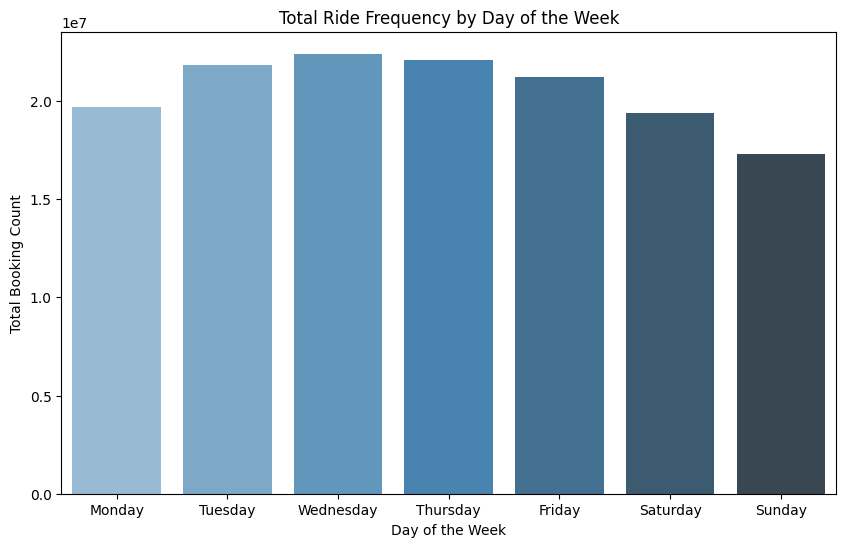

In [ ]:
# Ride Frequency by Day of the Week
plt.figure(figsize=(10, 6))
sns.barplot(x='day_of_week', y='booking_count', data=weekly_rides, palette='Blues_d')
plt.title('Total Ride Frequency by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Booking Count')
plt.savefig('/mnt/data/ride_frequency_by_day_of_week.png')  # Save plot for PPT
plt.show()


ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (50,) and arg 1 with shape (10,).

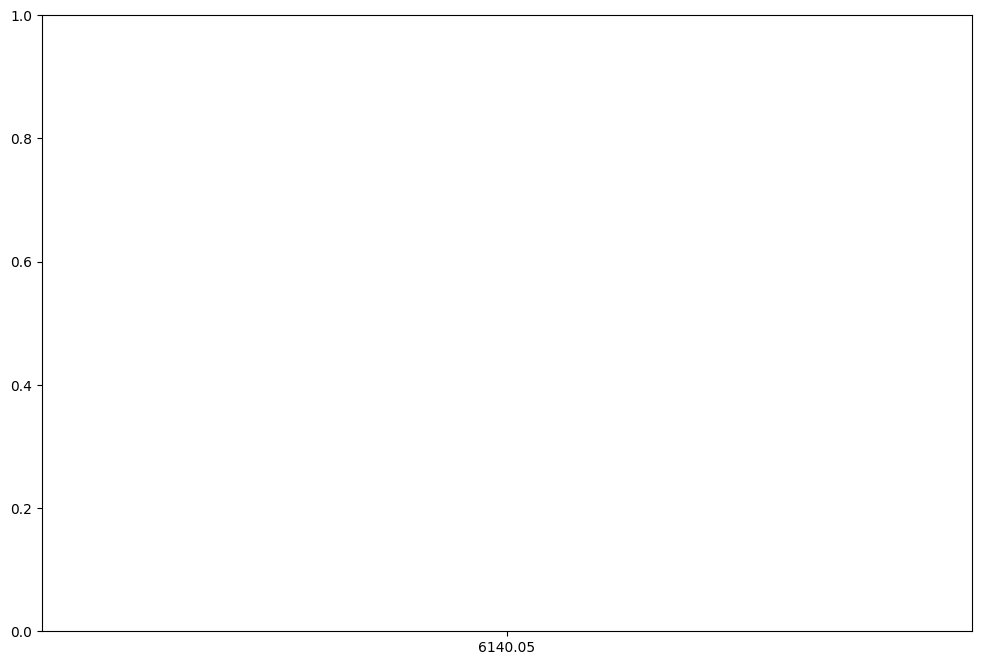

In [ ]:
# Station Utilization by Booking Count
plt.figure(figsize=(12, 8))
plt.bar(station_usage_sorted['start_station_id'][:50], station_usage_sorted['booking_count'][:10], color='skyblue')
plt.title('Top 10 Most Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Total Booking Count')
plt.xticks(rotation=90)
plt.savefig('/mnt/data/top_10_utilized_stations.png')  # Save plot for PPT
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/top_10_utilized_stations.png'

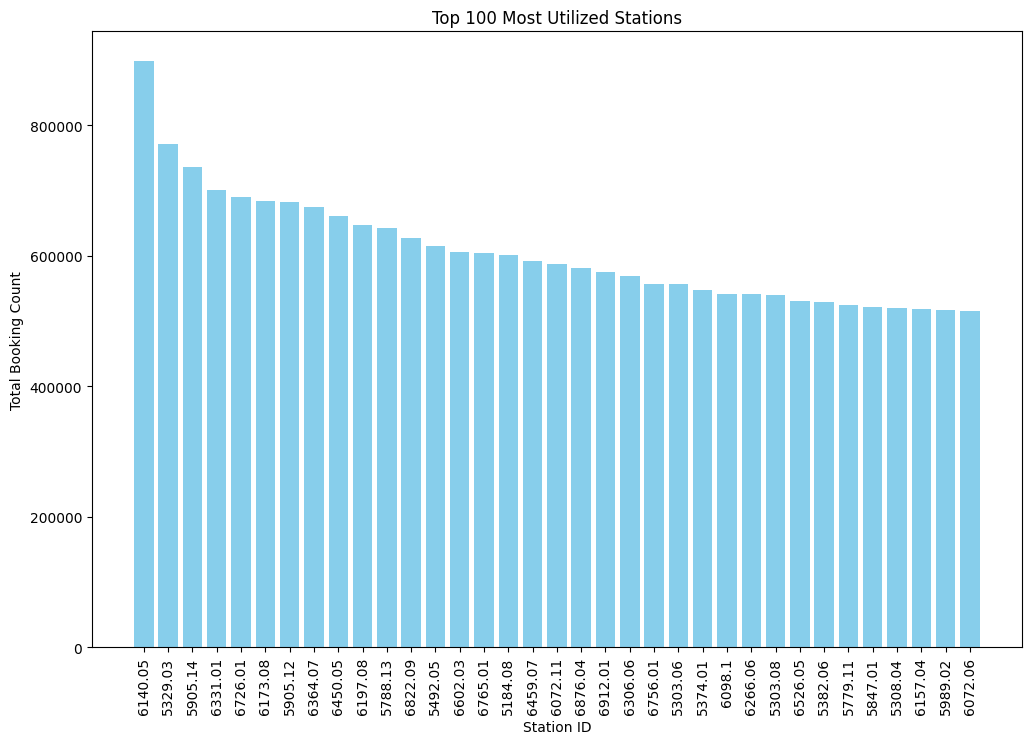

In [ ]:
# Station Utilization by Booking Count
plt.figure(figsize=(12, 8))
# Use the same slice for both x and height ([:10])
plt.bar(station_usage_sorted['start_station_id'][:35], station_usage_sorted['booking_count'][:35], color='skyblue')
plt.title('Top 100 Most Utilized Stations')
plt.xlabel('Station ID')
plt.ylabel('Total Booking Count')
plt.xticks(rotation=90)
plt.savefig('/mnt/data/top_10_utilized_stations.png')  # Save plot for PPT
plt.show()

FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/correlation_urban_features.png'

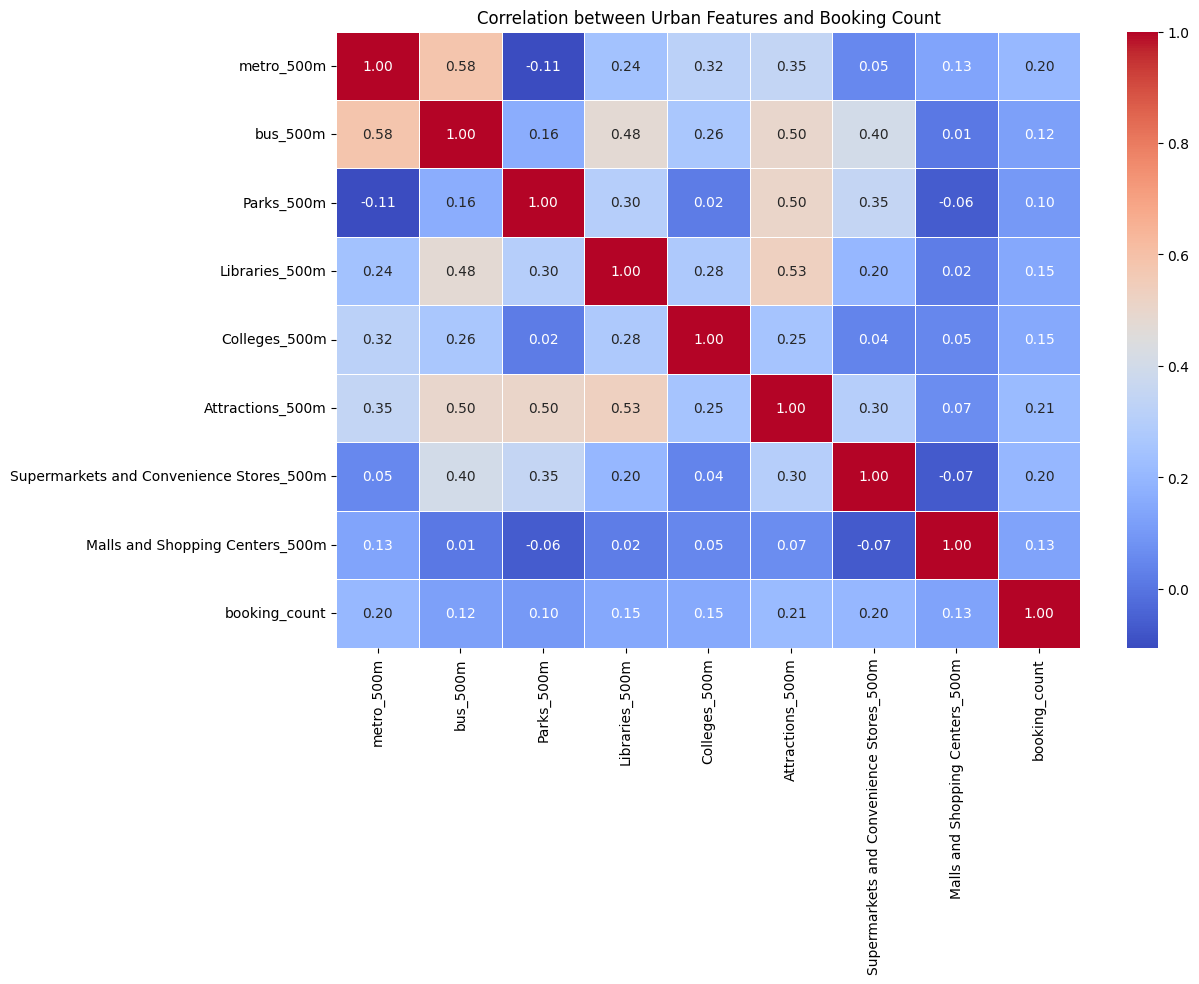

In [ ]:
# Correlation between Urban Features and Booking Count
plt.figure(figsize=(12, 8))
sns.heatmap(urban_corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation between Urban Features and Booking Count')
plt.savefig('/mnt/data/correlation_urban_features.png')  # Save plot for PPT
plt.show()


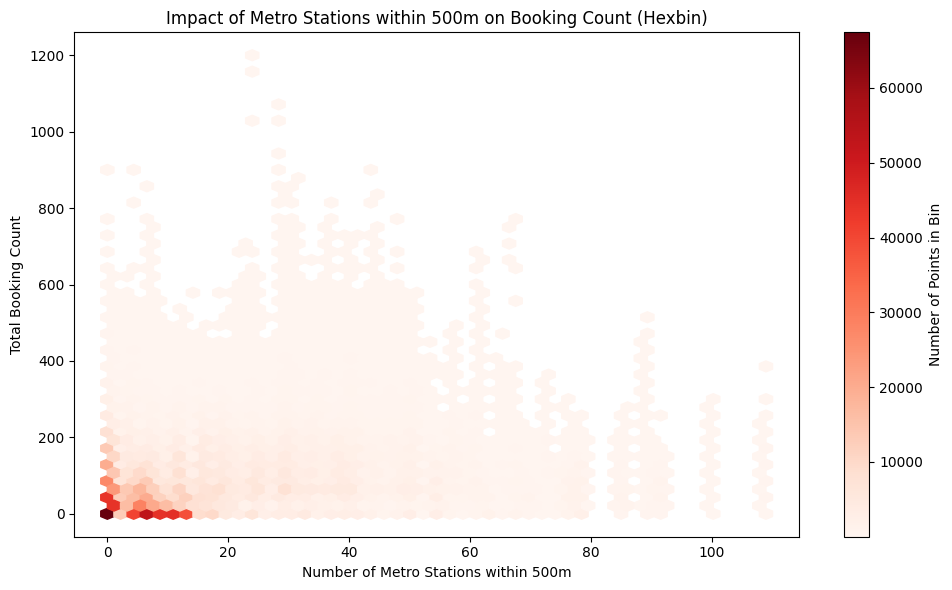

In [ ]:
# Create a hexbin plot to better visualize the density of the data
plt.figure(figsize=(10, 6))

# Use hexbin to plot the data, setting gridsize for better visualization
plt.hexbin(df_combined['metro_500m'], df_combined['booking_count'], gridsize=50, cmap='Reds', mincnt=1)

# Add color bar for reference
plt.colorbar(label='Number of Points in Bin')

# Label the axes and add title
plt.title('Impact of Metro Stations within 500m on Booking Count (Hexbin)')
plt.xlabel('Number of Metro Stations within 500m')
plt.ylabel('Total Booking Count')

# Display the plot
plt.tight_layout()

# Save the updated plot for PPT
#plt.savefig('/mnt/data/impact_of_metro_on_booking_hexbin.png')
plt.show()


In [ ]:
# Hexbin plot for the impact of 'Malls and Shopping Centers_500m' on booking_count
plt.figure(figsize=(10, 6))

# Use hexbin to plot the data for Malls within 500m vs booking_count
plt.hexbin(df_combined['Malls and Shopping Centers_500m'], df_combined['booking_count'], gridsize=50, cmap='Reds', mincnt=1)

# Add color bar for reference
plt.colorbar(label='Number of Points in Bin')

# Label the axes and add title
plt.title('Impact of Malls within 500m on Booking Count (Hexbin)')
plt.xlabel('Number of Malls within 500m')
plt.ylabel('Total Booking Count')

# Display the plot
plt.tight_layout()

# Save the updated plot for PPT
plt.savefig('/mnt/data/impact_of_malls_on_booking_hexbin.png')
plt.show()


NameError: name 'plt' is not defined

# Evaluate the impact of new bike stations on redistributing ridership demand.

In [ ]:
# Merge urban features with Citi Bike data
df_combined = pd.merge(df_citibike, df_urban, on='start_station_id', how='left')

# Check merged data for review
df_combined.head()


,start_station_id,DATE,booking_count,TAVG,metro_500m,bus_500m,Parks_500m,Libraries_500m,Colleges_500m,Attractions_500m,...,Supermarkets and Convenience Stores_500m,Malls and Shopping Centers_500m,"Restaurants, Cafes, and Bars_500m",Retail Stores_500m,hospitals_500m,residential_500m,civic_buildings_500m,event_venues_500m,start_lat,start_lng
0,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
1,4818.03,2021-01-01,4.0,36.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
2,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
3,4818.03,2021-01-02,16.0,43.5,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323
4,4818.03,2021-01-03,5.0,36.0,8,13,0,0,0,0,...,1,0,0,0,0,0,1,0,40.700295,-73.950323


In [ ]:
# Install necessary libraries (uncomment if needed)
# !pip install folium tqdm

import folium
from folium.plugins import MarkerCluster
from tqdm.notebook import tqdm  # Import tqdm for progress bar
from IPython.display import IFrame

# Initialize the map at a specific location (center of NYC)
nyc_map = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

# Create a MarkerCluster object for better handling of points
marker_cluster = MarkerCluster().add_to(nyc_map)

# Add stations as markers on the map with tqdm for a progress bar
for idx, row in tqdm(df_combined.iterrows(), total=df_combined.shape[0], desc="Adding Stations to Map"):
    folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup=f"Station: {row['start_station_id']}\nBookings: {row['booking_count']}",
        icon=folium.Icon(color='blue', icon='info-sign')
    ).add_to(marker_cluster)

# Save the map to an HTML file
map_file = '/content/nyc_bike_stations_map.html'
nyc_map.save(map_file)

# Display the map within the Colab notebook using IFrame
IFrame(map_file, width=700, height=500)


Adding Stations to Map:   0%|          | 0/1687329 [00:00<?, ?it/s]

In [ ]:
import geopandas as gpd
from shapely.geometry import Point

# Create a GeoDataFrame for stations' coordinates
geometry = [Point(xy) for xy in zip(df_combined['start_lng'], df_combined['start_lat'])]
gdf = gpd.GeoDataFrame(df_combined, geometry=geometry)

# Instead of using geopandas.datasets.get_path(), download the shapefile directly
# and provide the path to it. You can use wget or curl to download the file to
# your notebook's workspace (e.g. /content/ directory)

!wget https://www.naturalearthdata.com/http//www.naturalearthdata.com/download/110m/cultural/ne_110m_admin_0_boundary_lines_land.zip
!unzip ne_110m_admin_0_boundary_lines_land.zip

# Plot all stations on a map (using NYC map)
world = gpd.read_file("ne_110m_admin_0_boundary_lines_land.shp") # Load shapefile directly
nyc_map = world[world.name == 'United States of America'].to_crs(epsg=4326)

# Plot the stations on top of the NYC map
ax = nyc_map.plot(figsize=(12, 8), color='lightgray')
gdf.plot(ax=ax, markersize=5, color='blue', alpha=0.5)
plt.title('Bike Stations in New York City')
plt.show()

KeyboardInterrupt: 

In [ ]:
# Filter stations based on proximity to metro stations
metro_proximity = df_combined[df_combined['metro_500m'] > 0]

# Calculate average booking count for stations near metro stations
avg_booking_metro = metro_proximity['booking_count'].mean()

# Compare with stations far from metro stations
far_from_metro = df_combined[df_combined['metro_500m'] == 0]
avg_booking_far = far_from_metro['booking_count'].mean()

# Display results
print(f"Average Booking Count for Stations Near Metro: {avg_booking_metro}")
print(f"Average Booking Count for Stations Far from Metro: {avg_booking_far}")


In [ ]:
# Assuming you have a column to mark 'new' stations (e.g., 'new_station' column)
new_stations = df_combined[df_combined['new_station'] == 1]
existing_stations = df_combined[df_combined['new_station'] == 0]

# Compare booking counts for new and existing stations
avg_booking_new = new_stations['booking_count'].mean()
avg_booking_existing = existing_stations['booking_count'].mean()

# Display results
print(f"Average Booking Count for New Stations: {avg_booking_new}")
print(f"Average Booking Count for Existing Stations: {avg_booking_existing}")
